In [1]:
!pip install num2words
!pip install pyvi
!pip install underthesea
!pip install langid
!pip install vietnam-number


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 7.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=dc09ec3af531b27bd7d6248a41e4f19ab4955333703a7df1cebfbe38427486a4
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=c28c082ba90712319f4bc4163586c6e7185defe92bdd6bb6baa4105cc75f2928
  Stor

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from underthesea import word_tokenize
import unicodedata
import string
import re
import regex
import string
from wordcloud import WordCloud
import operator
import spacy
import joblib as jlb

from underthesea import word_tokenize, pos_tag, sent_tokenize as vie_sent
from pyvi import ViPosTagger, ViTokenizer, ViUtils

import langid
from vietnam_number import n2w
import num2words
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive') # Assuming you want to mount it to '/content/drive'

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/CGV reviews sentiment csv.csv')
df

,reviewer,time,context,ranking,Chi nhánh,Sentiment
0,Huyền Nguyễn,3 tháng trước,"Mình đã đặt vé trước qua app, khi đến lấy vé l...",1,CGV Hoàng Văn Thụ,0
1,Đạt Nguyễn Thành,9 tháng trước,"Rạp quá nóng xem phim mấy lần quá nóng , góp ý...",1,CGV Satra Củ Chi,0
2,Khánh Lâm Nguyễn,một năm trước,"Mua vé không hỏi trẻ em hay người lớn, cứ thế ...",1,CGV Pandora City,0
3,Lý Thanh Phong,4 tháng trước,"Nhân viên vô duyên, thiếu thân thiện và đứng c...",1,CGV Sư Vạn Hạnh,0
4,Anh Diệp Phúc,10 tháng trước,Mình đi xem phim suất 9h. Nhưng 9h05 vẫn chưa ...,1,CGV Vincom Thủ Đức,0
...,...,...,...,...,...,...
6077,Yến khỏe đẹp Youtube,9 tháng trước,"Xem rạp khá thú vị, bối cảnh xem tốt.\nRạp có ...",5,CGV Vincom Thủ Đức,1
6078,Kemasta Genhiro,một năm trước,"Deco đẹp, ghế ngồi thoải mái, âm thanh ổn, khô...",5,CGV Vincom Thủ Đức,1
6079,Dương Văn Thẳng,một năm trước,Nói chung Ok như các rạp khác\nCó 3D\nToilet c...,5,CGV Lý Chính Thắng,1
6080,Chanchal Mohit (Myk),6 năm trước,Nơi mát mẻ. Đặt vé bằng tài khoản trực tuyến g...,5,CGV CT,1


### **EDA**

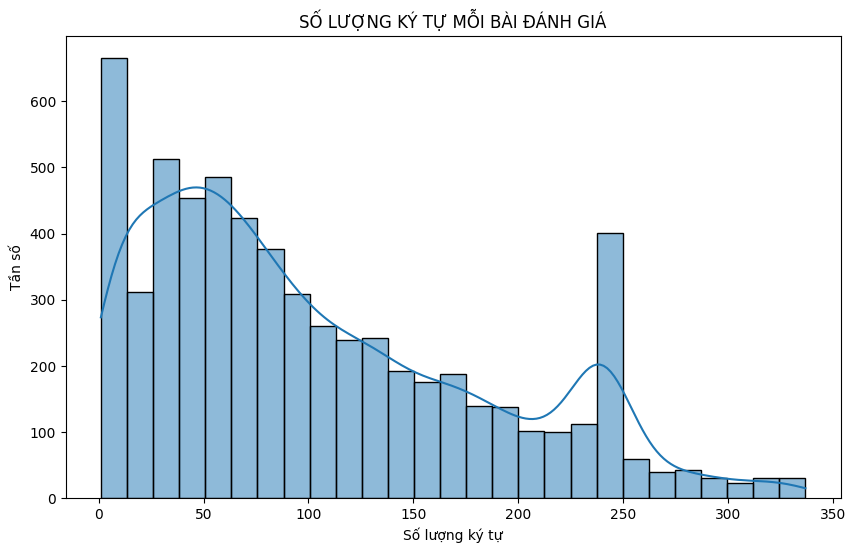

In [5]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['context'].str.len(), kde=True) # Use histplot for better visualization

# Customize the plot (optional)
plt.title('SỐ LƯỢNG KÝ TỰ MỖI BÀI ĐÁNH GIÁ')
plt.xlabel('Số lượng ký tự')
plt.ylabel('Tần số')
plt.show()


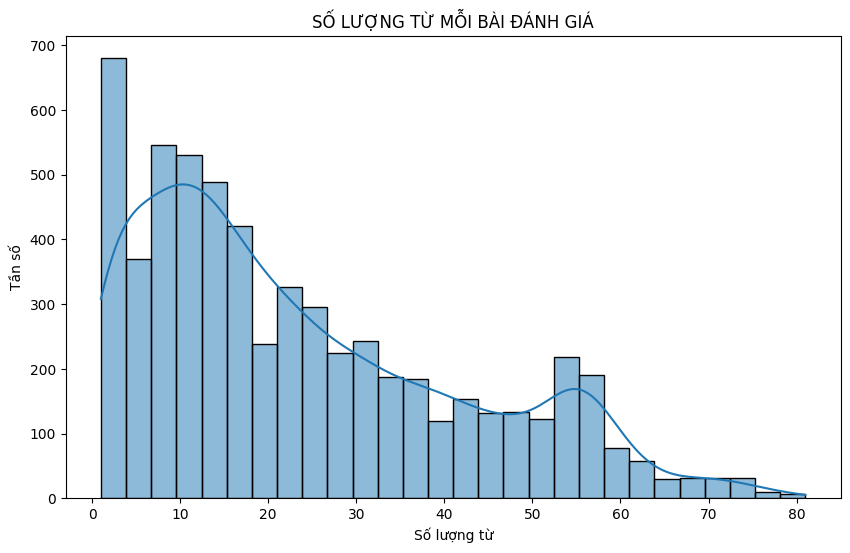

In [6]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['context'].str.split().map(lambda x: len(x)), kde=True) # Use histplot for better visualization

# Customize the plot (optional)
plt.title('SỐ LƯỢNG TỪ MỖI BÀI ĐÁNH GIÁ')
plt.xlabel('Số lượng từ')
plt.ylabel('Tần số')
plt.show()

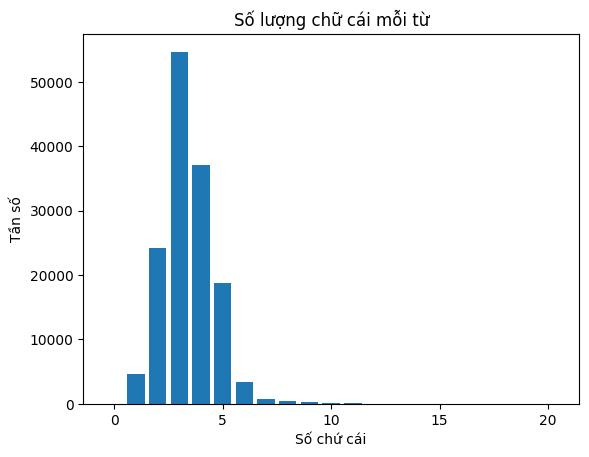

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the number of characters in each word of the 'context' column
df['word_lengths'] = df['context'].apply(lambda x: [len(word) for word in x.split()])

# Flatten the list of word lengths into a single series
all_word_lengths = [length for sublist in df['word_lengths'] for length in sublist]

# Create a histogram of word lengths
plt.hist(all_word_lengths, bins=np.arange(0, max(all_word_lengths) + 2) - 0.5, align='mid', rwidth=0.8)

# Customize the plot
plt.title('Số lượng chữ cái mỗi từ')
plt.xlabel('Số chứ cái')
plt.ylabel('Tần số')

# Display the plot
plt.show()

df.drop(columns='word_lengths', inplace = True)

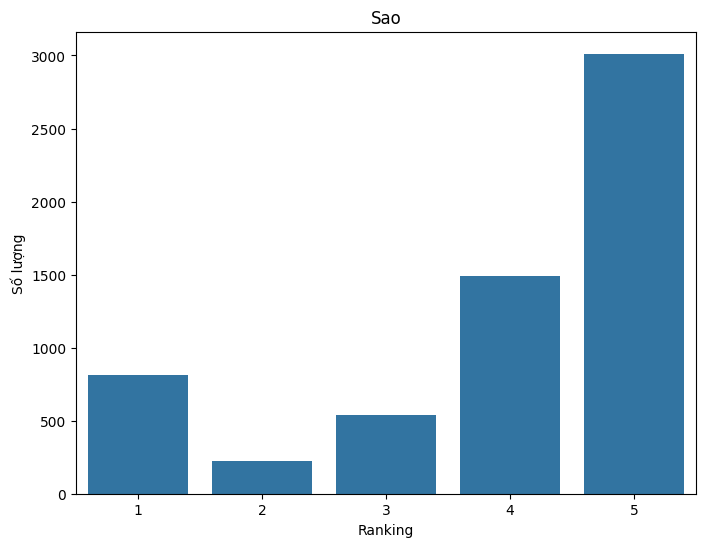

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ranking', data=df)
plt.xlabel("Ranking")
plt.ylabel("Số lượng")
plt.title("Sao")
plt.show()

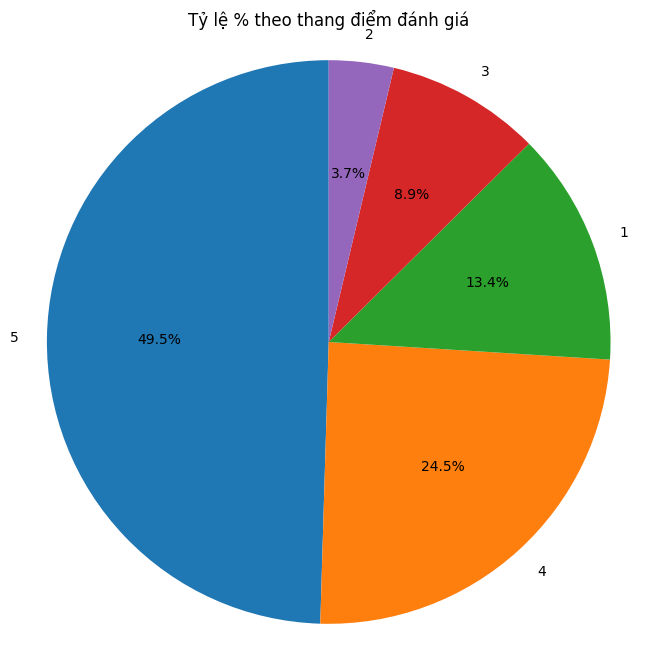

In [9]:
# Count the occurrences of each ranking value
ranking_counts = df['ranking'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ranking_counts, labels=ranking_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ % theo thang điểm đánh giá')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


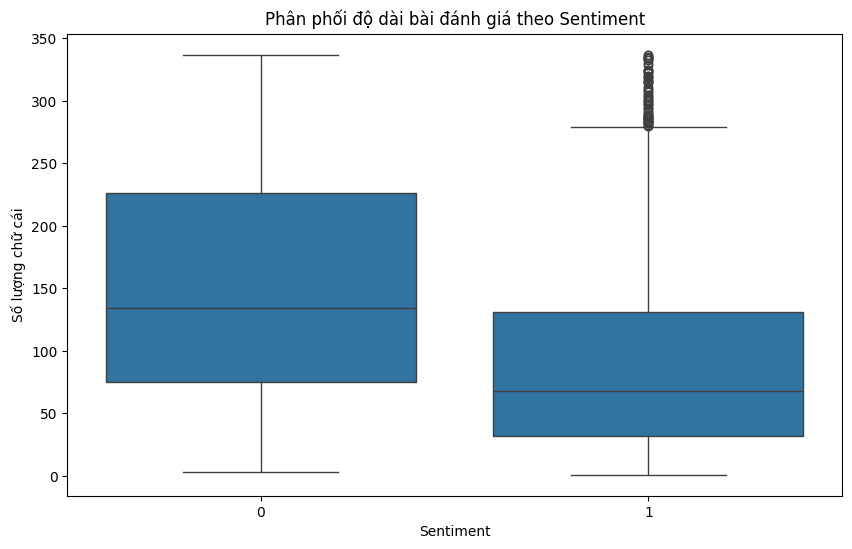

In [10]:
# Calculate the length of the 'context' column
df['context_length'] = df['context'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='context_length', data=df)
plt.title('Phân phối độ dài bài đánh giá theo Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Số lượng chữ cái')
plt.show()

df.drop(columns = 'context_length', inplace = True)

### **TIỀN XỬ LÝ DỮ LIỆU**

In [11]:
def normalize_vietnamese(text):
    return unicodedata.normalize('NFKC', text)

def remove_special_patterns(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Loại bỏ URL
    text = re.sub(r'\S+@\S+', '', text)                 # Loại bỏ email
    return text

def loai_dau(text):
    # Thay thế tất cả chuỗi dấu chấm liên tiếp (2 hoặc nhiều dấu chấm) thành một khoảng trắng
    text = re.sub(r'\.{2,}', ' ', text)  # \.{2,} tìm tất cả dấu '.' liên tiếp (>=2)
    special_char = [':',')','(','.',',',';','!','?','…','/','\\','|','-','_']
    for char in special_char:
        text = text.replace(char, ' ') # Use str.replace directly
    return text


def remove_emoji(text):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF"
                              u"\U0001F700-\U0001F77F"
                              u"\U0001F780-\U0001F7FF"
                              u"\U0001F800-\U0001F8FF"
                              u"\U0001F900-\U0001F9FF"
                              u"\U0001FA00-\U0001FA6F"
                              u"\U0001FA70-\U0001FAFF"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def preprocess(text):
    text = remove_special_patterns(text)  # Loại bỏ URL, email
    text = loai_dau(text)       # Loại bỏ dấu câu
    text = remove_emoji(text)             # Loại bỏ emoji
    text = normalize_vietnamese(text)     # Chuẩn hóa tiếng Việt
    text = text.lower()                   # Chuyển thành chữ thường
    return text


In [12]:
df['pre_context'] = df['context'].apply(preprocess)
df.head(5)

,reviewer,time,context,ranking,Chi nhánh,Sentiment,pre_context
0,Huyền Nguyễn,3 tháng trước,"Mình đã đặt vé trước qua app, khi đến lấy vé l...",1,CGV Hoàng Văn Thụ,0,mình đã đặt vé trước qua app khi đến lấy vé l...
1,Đạt Nguyễn Thành,9 tháng trước,"Rạp quá nóng xem phim mấy lần quá nóng , góp ý...",1,CGV Satra Củ Chi,0,rạp quá nóng xem phim mấy lần quá nóng góp ý...
2,Khánh Lâm Nguyễn,một năm trước,"Mua vé không hỏi trẻ em hay người lớn, cứ thế ...",1,CGV Pandora City,0,mua vé không hỏi trẻ em hay người lớn cứ thế ...
3,Lý Thanh Phong,4 tháng trước,"Nhân viên vô duyên, thiếu thân thiện và đứng c...",1,CGV Sư Vạn Hạnh,0,nhân viên vô duyên thiếu thân thiện và đứng c...
4,Anh Diệp Phúc,10 tháng trước,Mình đi xem phim suất 9h. Nhưng 9h05 vẫn chưa ...,1,CGV Vincom Thủ Đức,0,mình đi xem phim suất 9h nhưng 9h05 vẫn chưa ...


## **Bỏ Stopword**

In [13]:
file_path = '/content/vietnamese-stopwords.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    vn_stopwords = file.readlines()

# Loại bỏ ký tự xuống dòng (\n) nếu cần
vn_stopwords = [word.strip() for word in vn_stopwords]


In [14]:
df['pre_context'] = df['pre_context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in vn_stopwords]))

In [15]:
df['pre_context'].head(5)

,pre_context
0,vé app vé hướng phòng chiếu rạp 2 tầng tầng 1 ...
1,rạp nóng phim mấy nóng góp khắc phục góp công ...
2,mua vé trẻ tiền bill đồng vé hệ thống hệ thống
3,nhân viên vô duyên thân thiện đứng hỗ trợ hàng...
4,đi phim suất 9h 9h05 quầy vé hỉ bắp quản lý tệ 2


## **Kiểm tra các từ có độ dài > 7**

In [16]:
long_words_list = []

# Iterate through the 'pre_context' column
for text in df['pre_context']:
    # Check if the text is a string (handle potential missing values or other data types)
    if isinstance(text, str):
        # Split the text into words
        words = text.split()
        # Iterate through the words
        for word in words:
            # Check if the word length is greater than 7
            if len(word) > 7:
                long_words_list.append(word)
    else:
        # Handle cases where 'text' is not a string
        pass  # You can choose to skip these or add a placeholder

# Print the list of long words
print(long_words_list)

['complain', 'saturday', 'complain', 'complain', 'spiderman', 'training', 'doraemon', 'training', 'hollywoood', 'seriously', 'complain', 'transformer', 'doraemon', 'training', 'citypoint', 'boogeyman', 'sweetbox', 'merchanise', 'preminum', 'doraemon', 'doraemon', 'doraemon', 'cresscent', 'training', 'academia', 'doraemon', 'oppenheimer', 'birthday', 'impossible', 'oppenheimer', '“cheating”', 'training', 'landmark', 'landmark', 'doraemon', 'sweetbox', 'doraemon', 'impossible', 'tranning', '"infinity', 'training', 'landmark', 'gladiator', 'recommend', 'comeback', 'gigamail', 'despicable', 'crescent', 'landmark', 'tranformer', 'citipoint', 'california', '289k+89k', 'landmark', 'doreamon', 'landmark', 'bardcode', 'avengers', 'training', 'sweetbox', 'sweetbox', 'training', 'oppenheimer', '13h40phut', 'takashimaya', 'vinhomes', 'ticketbox', 'complain', 'samsungpay', 'vinhomes', 'tokbokki', 'backdrop', 'deadpool', 'makerting', 'cinestar', 'crescent', 'kingkong', 'infinity', 'trainning', 'murs

## **Word Tokenize**

In [17]:
def wt(sentence):
    tokens = ViTokenizer.tokenize(sentence).split()
    return tokens

In [18]:
df['tokens'] = df.apply(lambda row: wt(row['pre_context']), axis=1)
print(df['tokens'])

0       [vé, app, vé, hướng, phòng, chiếu, rạp, 2, tần...
1       [rạp, nóng, phim, mấy, nóng, góp, khắc_phục, g...
2       [mua, vé, trẻ, tiền, bill, đồng, vé, hệ_thống,...
3       [nhân_viên, vô_duyên, thân_thiện, đứng, hỗ_trợ...
4       [đi, phim, suất, 9h, 9h05, quầy, vé, hỉ, bắp, ...
                              ...                        
6077    [rạp, thú_vị, bối_cảnh, rạp, bắp, đi, chiếu, x...
6078    [deco, đẹp, ghế, thoải_mái, âm, ổn, gian, ấm_c...
6079                     [ok, rạp, 3d, toilet, hơi, đông]
6080         [mát_mẻ, vé, tài_khoản, trực_tuyến, giá, rẻ]
6081                                     [sạch, cửa_hàng]
Name: tokens, Length: 6082, dtype: object


In [19]:
vietnamese_tokens_list = [token for sublist in df['tokens'].tolist() for token in sublist]
print("Vietnamese Tokens:", vietnamese_tokens_list)

Vietnamese Tokens: ['vé', 'app', 'vé', 'hướng', 'phòng', 'chiếu', 'rạp', '2', 'tầng', 'tầng', '1', 'nhân_viên', 'tầng', '2', 'coi', 'nửa', 'phim', 'tắt', 'đèn', 'nhân_viên', 'lầu', '2', 'coi', 'phim', 'conan', 'chẳng', 'lẻ', 'chạy', 'tầng', '1', 'tắt_đèn', 'rạp', 'nóng', 'phim', 'mấy', 'nóng', 'góp', 'khắc_phục', 'góp', 'công_khai', 'tảng', 'nha', 'mua', 'vé', 'trẻ', 'tiền', 'bill', 'đồng', 'vé', 'hệ_thống', 'hệ_thống', 'nhân_viên', 'vô_duyên', 'thân_thiện', 'đứng', 'hỗ_trợ', 'hàng', 'bất_kỳ', 'vấn_đề', 'ngoại_trừ', 'hàng', 'xong', 'thèm', 'tâm', 'đi', 'phim', 'suất', '9h', '9h05', 'quầy', 'vé', 'hỉ', 'bắp', 'quản_lý', 'tệ', '2', 'rạp', 'mã', 'ưu_đãi', 'galaxy', 'nhân_viên', 'check', 'xong', 'báo', 'thành_công', 'kêu', 'mã', 'đồ', 'đi', 'kèm', 'ko', 'đội', 'tiền', 'kinh_khủng', 'kêu', '2', 'ly', 'bình', 'khống', 'kèm', 'combo', 'giá', '199', '2', 'ly', 'bình', '78k', 'kiểu', 'chúc', 'rạp', 'vắng', 'nha_đồ', 'lừa_lọc', 'cgv', 'vui', 'bảo_trì', 'rạp', '7', 'imax', 'vivo', 'hiện', 'màn_hì

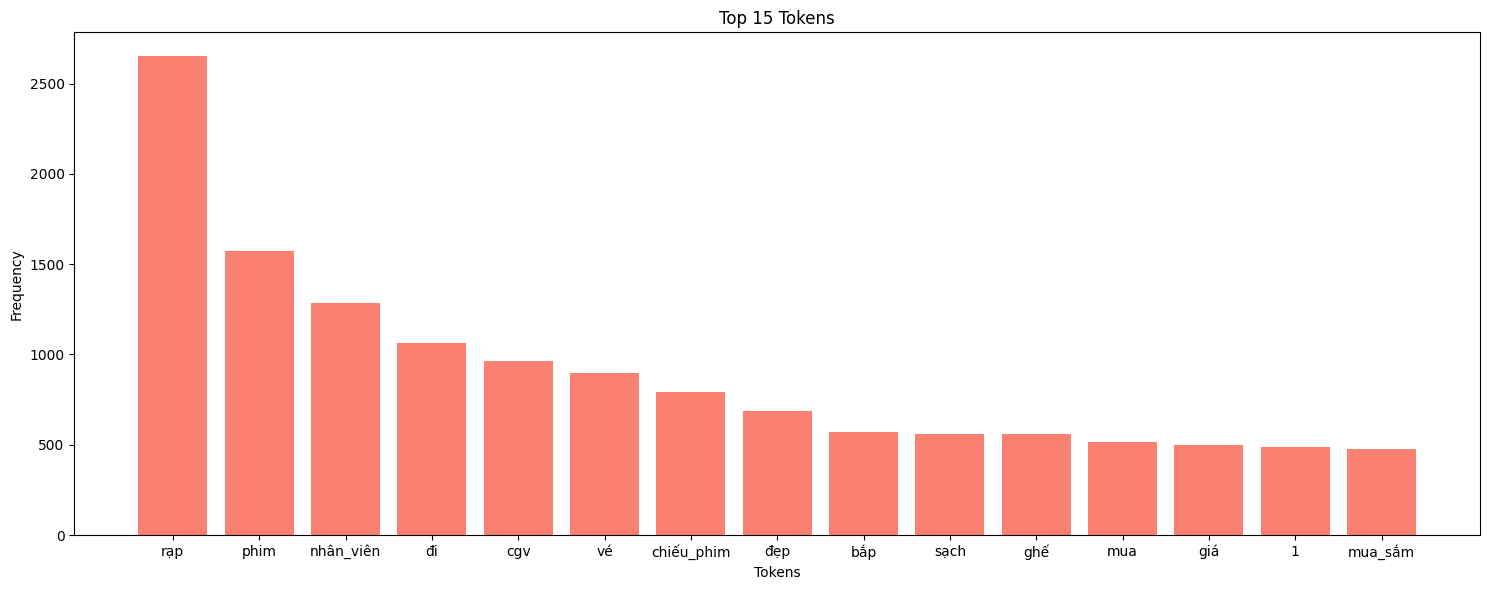

In [20]:
# Count the frequency of tokens in each list
vietnamese_token_counts = Counter(vietnamese_tokens_list)

# Get the top 15 most frequent tokens
top_15_vietnamese_tokens = dict(vietnamese_token_counts.most_common(15))

plt.figure(figsize=(15, 6))  # Optional: Adjust figure size
plt.bar(top_15_vietnamese_tokens.keys(), top_15_vietnamese_tokens.values(), color='salmon')
plt.title('Top 15 Tokens')  # Set title using plt.title
plt.xlabel('Tokens')  # Set x-axis label using plt.xlabel
plt.ylabel('Frequency')  # Set y-axis label using plt.ylabel

plt.tight_layout()
plt.show()

## **WORD CLOUD**

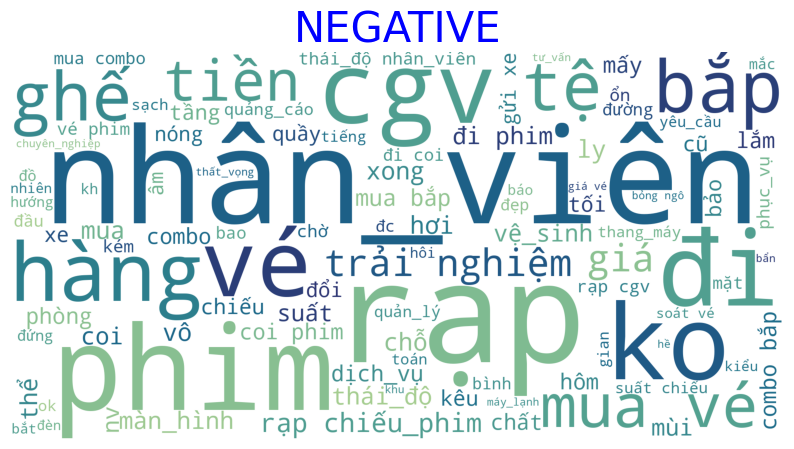

In [21]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = df[df['Sentiment'] == 0]['tokens'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('NEGATIVE', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()

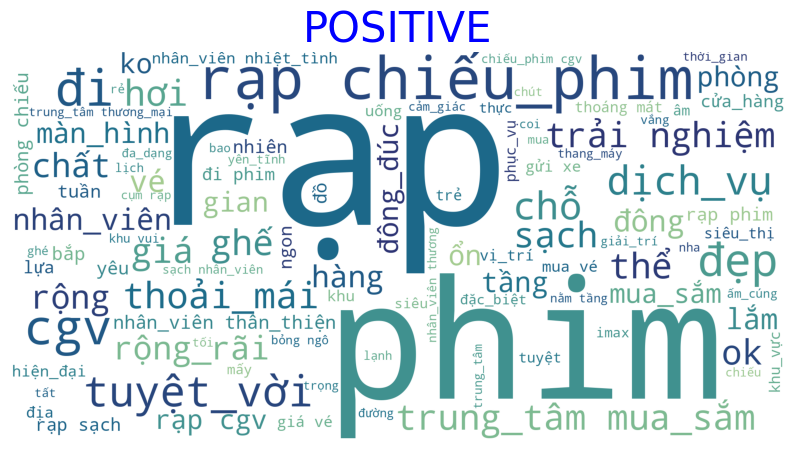

In [22]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = df[df['Sentiment'] == 1]['tokens'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('POSITIVE', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()

## *PHÂN TÍCH BÌNH LUẬN TIÊU CỰC*

In [23]:
time_list = list(df['time'].unique())
print(time_list)

['3 tháng trước', '9 tháng trước', 'một năm trước', '4 tháng trước', '10 tháng trước', '5 năm trước', '2 tháng trước', '2 năm trước', '7 năm trước', '6 tháng trước', '7 tháng trước', 'một tháng trước', '4 năm trước', '6 năm trước', '8 tháng trước', '5 tháng trước', '3 tuần trước', '3 ngày trước', '2 tuần trước', '11 tháng trước', '8 năm trước', '3 năm trước', 'một tuần trước', '4 tuần trước', '5 ngày trước', '6 ngày trước', '9 năm trước', '4 ngày trước', '11 năm trước']


In [24]:
def convert_to_days(time_str):
    # Chuyển đổi số từ tiếng Việt sang số nguyên
    vietnamese_numbers = {
        "một": 1, "hai": 2, "ba": 3, "bốn": 4, "năm": 5, "sáu": 6, "bảy": 7,
        "tám": 8, "chín": 9, "mười": 10, "mười một": 11, "mười hai": 12
    }

    # Tìm số trong chuỗi
    match = re.match(r"(\d+|một|hai|ba|bốn|năm|sáu|bảy|tám|chín|mười|mười một|mười hai)", time_str)
    if not match:
        return float('inf')  # Trả về giá trị lớn nhất nếu không xác định được

    # Lấy số lượng
    quantity = match.group(1)
    if quantity in vietnamese_numbers:
        quantity = vietnamese_numbers[quantity]
    else:
        quantity = int(quantity)

    # Xác định đơn vị thời gian
    if "năm" in time_str:
        return quantity * 365
    elif "tháng" in time_str:
        return quantity * 30
    elif "tuần" in time_str:
        return quantity * 7
    elif "ngày" in time_str:
        return quantity
    else:
        return float('inf')  # Trả về giá trị lớn nhất nếu không xác định được

# Sắp xếp danh sách
sorted_time_list = sorted(time_list, key=convert_to_days, reverse=False)

# Kết quả
print(sorted_time_list)


['3 ngày trước', '4 ngày trước', '5 ngày trước', '6 ngày trước', 'một tuần trước', '2 tuần trước', '3 tuần trước', '4 tuần trước', 'một tháng trước', '2 tháng trước', '3 tháng trước', '4 tháng trước', '5 tháng trước', '6 tháng trước', '7 tháng trước', '8 tháng trước', '9 tháng trước', '10 tháng trước', '11 tháng trước', 'một năm trước', '2 năm trước', '3 năm trước', '4 năm trước', '5 năm trước', '6 năm trước', '7 năm trước', '8 năm trước', '9 năm trước', '11 năm trước']


In [28]:
# Tìm những review có sentiment = 0, chứa từ 'rạp'
cinema_reviews = df[(df['Sentiment'] == 0) & df['tokens'].apply(lambda x: 'rạp' in x)]

# Sắp xếp theo thứ tự thời gian dựa trên danh sách sorted_time_list
cinema_reviews['time_index'] = cinema_reviews['time'].apply(lambda x: sorted_time_list.index(x))
cinema_reviews = cinema_reviews.sort_values(by='time_index', ascending=True)

# Hiển thị các cột liên quan
cinema_reviews[['reviewer','context','time','Sentiment']]

,reviewer,context,time,Sentiment
937,Tuyết Tuyết,Hôm nay mình coi suất 21h20 Moana rạp 01 phim ...,5 ngày trước,0
1018,Nam Le,"Mua vé online, đã có vé điện tử mà lại phải ra...",6 ngày trước,0
166,Duy Dang,"Này, nếu bạn không thể bật AC sau 10 giờ tối, ...",một tuần trước,0
2952,Anh Do,"Rạp nhỏ, tương đối ít suất chiếu và vằng vẻ; r...",một tuần trước,0
316,long van thuan,"Nhân viên không nhiệt tình, cho 1 sao, rạp ngà...",một tuần trước,0
...,...,...,...,...
1118,Huy Mai,Rạp chiếu phim rất nhỏ. Phải đặt trước.,8 năm trước,0
2857,Andrew Ayres,Nhỏ hơn một số rạp chiếu phim khác mang lại cả...,8 năm trước,0
1196,Thang Trinh,"Không gian đẹp, hiện đại, chất lượng phòng chi...",8 năm trước,0
940,Thuận Phạm Tư,"Ghế nhỏ, ngồi mỏi cổ và không thoải mái. Rạp p...",8 năm trước,0


In [29]:
for index, row in cinema_reviews.iterrows():
    print(f'Tên người đánh giá: {row["reviewer"]}\nThời gian: {row["time"]}\nNội dung đánh giá: {row["context"]}',
          '\n---------------------------------------------------------------------------')

Tên người đánh giá: Tuyết Tuyết
Thời gian: 5 ngày trước
Nội dung đánh giá: Hôm nay mình coi suất 21h20 Moana rạp 01 phim bị đứng 2 lần và hình ảnh chiếu bị phóng to quá nên k đọc được hết chữ. Rạp chuyên nghiệp mà như v k hiểu nổi 
---------------------------------------------------------------------------
Tên người đánh giá: Nam Le
Thời gian: 6 ngày trước
Nội dung đánh giá: Mua vé online, đã có vé điện tử mà lại phải ra quầy in vé giấy để vào rạp, vừa mất công vừa lãng phí 
---------------------------------------------------------------------------
Tên người đánh giá: Duy Dang
Thời gian: một tuần trước
Nội dung đánh giá: Này, nếu bạn không thể bật AC sau 10 giờ tối, tốt nhất nên có mức giá tốt hơn.

Khách hàng không muốn trả tiền cho một rạp chiếu phim địa ngục không thể làm được gì với điều hòa trong khi khu vực khác như lối đi vẫn hoạt động. 
---------------------------------------------------------------------------
Tên người đánh giá: Anh Do
Thời gian: một tuần trước
Nội dung đánh

In [26]:
# Tìm những review có sentiment = 0, chứa từ 'nhân_viên'
cinema_reviews = df[(df['Sentiment'] == 0) & df['tokens'].apply(lambda x: 'nhân_viên' in x)]

# Sắp xếp theo thứ tự thời gian dựa trên danh sách sorted_time_list
cinema_reviews['time_index'] = cinema_reviews['time'].apply(lambda x: sorted_time_list.index(x))
cinema_reviews = cinema_reviews.sort_values(by='time_index', ascending=True)

# Hiển thị các cột liên quan
cinema_reviews[['reviewer','context','time','Sentiment']]

,reviewer,context,time,Sentiment
63,Thủy Tiên Phạm,"Đi xem phim ở đây phòng4 chiếu trễ, người xem ...",3 ngày trước,0
1085,Jake Ng,"nhân viên bãi xe cọc cằn,quầy bắp tư vấn ko rõ...",một tuần trước,0
830,Vy Kim,bạn nhân viên nữ bán vé với bắp nước ca 12h tr...,một tuần trước,0
1458,Như Huỳnh,Mình đã có trải nghiệm khá tệ tại CGV Tân Phú ...,một tuần trước,0
316,long van thuan,"Nhân viên không nhiệt tình, cho 1 sao, rạp ngà...",một tuần trước,0
...,...,...,...,...
1090,Đỗ An Duy,Quy định rất lỏng lẻo. Mọi người nói chuyện và...,7 năm trước,0
899,Thạch Trận Trần,Nơi giữ xe hơi chật - không đươc thoải mái cho...,7 năm trước,0
765,Di Thiên,Hôm nay muốn ăn nên thay vì đi cgv hoàng văn t...,7 năm trước,0
676,Nha Huynh,Dịch vụ của CGV Gò Vấp tệ nhất so với các CGV ...,7 năm trước,0


In [30]:
for index, row in cinema_reviews.iterrows():
    print(f'Tên người đánh giá: {row["reviewer"]}\nThời gian: {row["time"]}\nNội dung đánh giá: {row["context"]}',
          '\n---------------------------------------------------------------------------')

Tên người đánh giá: Tuyết Tuyết
Thời gian: 5 ngày trước
Nội dung đánh giá: Hôm nay mình coi suất 21h20 Moana rạp 01 phim bị đứng 2 lần và hình ảnh chiếu bị phóng to quá nên k đọc được hết chữ. Rạp chuyên nghiệp mà như v k hiểu nổi 
---------------------------------------------------------------------------
Tên người đánh giá: Nam Le
Thời gian: 6 ngày trước
Nội dung đánh giá: Mua vé online, đã có vé điện tử mà lại phải ra quầy in vé giấy để vào rạp, vừa mất công vừa lãng phí 
---------------------------------------------------------------------------
Tên người đánh giá: Duy Dang
Thời gian: một tuần trước
Nội dung đánh giá: Này, nếu bạn không thể bật AC sau 10 giờ tối, tốt nhất nên có mức giá tốt hơn.

Khách hàng không muốn trả tiền cho một rạp chiếu phim địa ngục không thể làm được gì với điều hòa trong khi khu vực khác như lối đi vẫn hoạt động. 
---------------------------------------------------------------------------
Tên người đánh giá: Anh Do
Thời gian: một tuần trước
Nội dung đánh

In [31]:
df.to_csv('CGV reviews sentiment 2.csv', index=False, encoding='utf-8')

,reviewer,time,context,ranking,Chi nhánh,Sentiment,pre_context,tokens
0,Huyền Nguyễn,3 tháng trước,"Mình đã đặt vé trước qua app, khi đến lấy vé l...",1,CGV Hoàng Văn Thụ,0,vé app vé hướng phòng chiếu rạp 2 tầng tầng 1 ...,"[vé, app, vé, hướng, phòng, chiếu, rạp, 2, tần..."
1,Đạt Nguyễn Thành,9 tháng trước,"Rạp quá nóng xem phim mấy lần quá nóng , góp ý...",1,CGV Satra Củ Chi,0,rạp nóng phim mấy nóng góp khắc phục góp công ...,"[rạp, nóng, phim, mấy, nóng, góp, khắc_phục, g..."
2,Khánh Lâm Nguyễn,một năm trước,"Mua vé không hỏi trẻ em hay người lớn, cứ thế ...",1,CGV Pandora City,0,mua vé trẻ tiền bill đồng vé hệ thống hệ thống,"[mua, vé, trẻ, tiền, bill, đồng, vé, hệ_thống,..."
3,Lý Thanh Phong,4 tháng trước,"Nhân viên vô duyên, thiếu thân thiện và đứng c...",1,CGV Sư Vạn Hạnh,0,nhân viên vô duyên thân thiện đứng hỗ trợ hàng...,"[nhân_viên, vô_duyên, thân_thiện, đứng, hỗ_trợ..."
4,Anh Diệp Phúc,10 tháng trước,Mình đi xem phim suất 9h. Nhưng 9h05 vẫn chưa ...,1,CGV Vincom Thủ Đức,0,đi phim suất 9h 9h05 quầy vé hỉ bắp quản lý tệ 2,"[đi, phim, suất, 9h, 9h05, quầy, vé, hỉ, bắp, ..."
...,...,...,...,...,...,...,...,...
6077,Yến khỏe đẹp Youtube,9 tháng trước,"Xem rạp khá thú vị, bối cảnh xem tốt.\nRạp có ...",5,CGV Vincom Thủ Đức,1,rạp thú vị bối cảnh rạp bắp đi chiếu xếp hàng ...,"[rạp, thú_vị, bối_cảnh, rạp, bắp, đi, chiếu, x..."
6078,Kemasta Genhiro,một năm trước,"Deco đẹp, ghế ngồi thoải mái, âm thanh ổn, khô...",5,CGV Vincom Thủ Đức,1,deco đẹp ghế thoải mái âm ổn gian ấm cúng phàn...,"[deco, đẹp, ghế, thoải_mái, âm, ổn, gian, ấm_c..."
6079,Dương Văn Thẳng,một năm trước,Nói chung Ok như các rạp khác\nCó 3D\nToilet c...,5,CGV Lý Chính Thắng,1,ok rạp 3d toilet hơi đông,"[ok, rạp, 3d, toilet, hơi, đông]"
6080,Chanchal Mohit (Myk),6 năm trước,Nơi mát mẻ. Đặt vé bằng tài khoản trực tuyến g...,5,CGV CT,1,mát mẻ vé tài khoản trực tuyến giá rẻ,"[mát_mẻ, vé, tài_khoản, trực_tuyến, giá, rẻ]"
